### Artificial Neural Networks

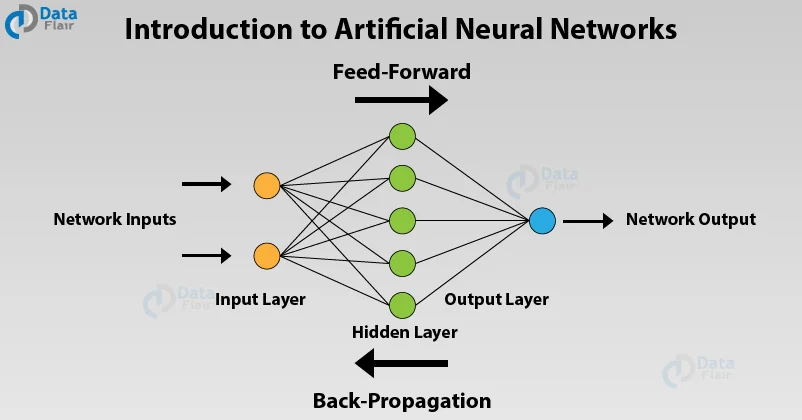

### Convolutional Neural Networks

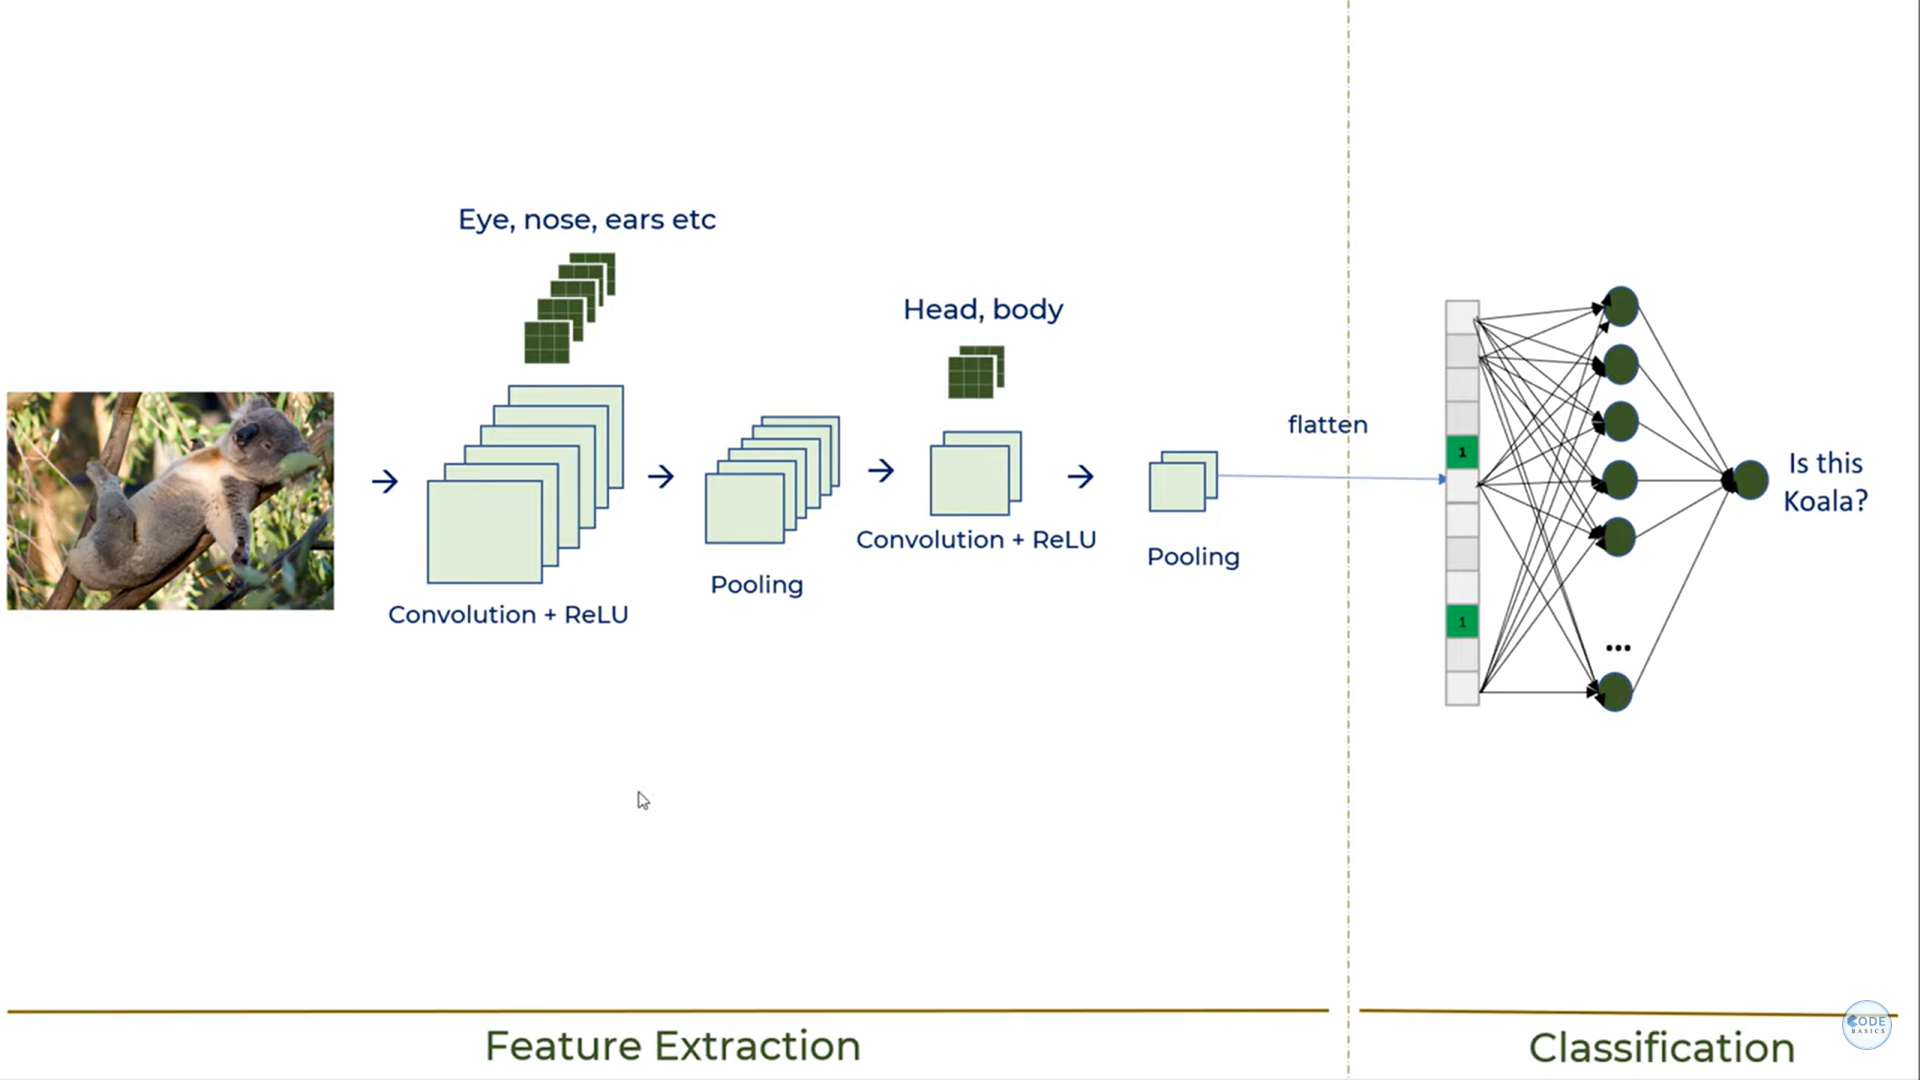

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

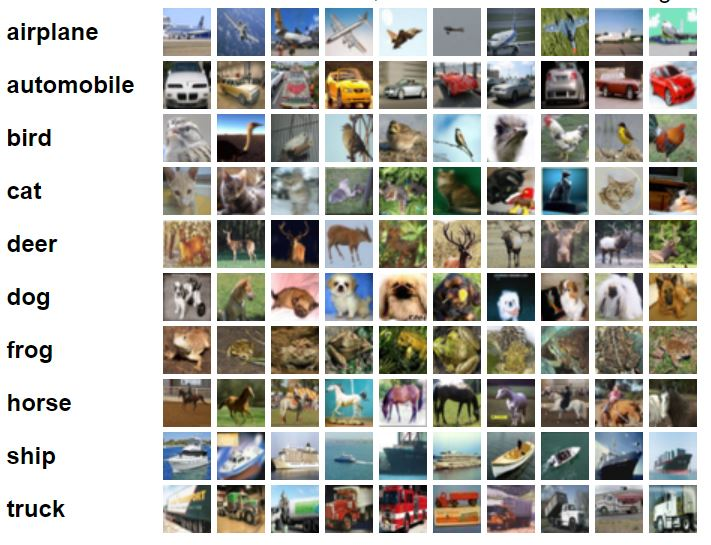

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

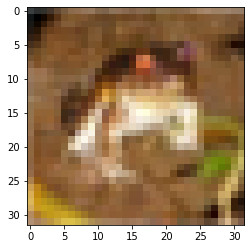

In [6]:
plt.imshow(x_train[0])

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ['airoplane', 'automobile', 'bird', 'cat',
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def plot_sample(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

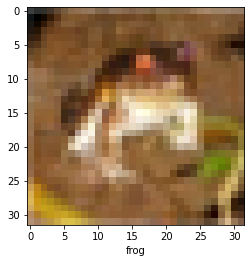

In [11]:
plot_sample(x_train, y_train, 0)

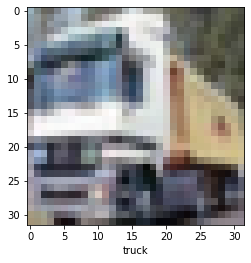

In [12]:
plot_sample(x_train, y_train, 1)

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
ann_model.compile(optimizer='adam',
                 loss= 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])
ann_model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 148s 94ms/step - loss: 1.8762 - accuracy: 0.3300
Epoch 2/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.6522 - accuracy: 0.4081
Epoch 3/5
1563/1563 [==============================] - 135s 86ms/step - loss: 1.5757 - accuracy: 0.4367
Epoch 4/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.5187 - accuracy: 0.4553
Epoch 5/5
1563/1563 [==============================] - 140s 89ms/step - loss: 1.4885 - accuracy: 0.4675


In [16]:
ann_model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.5305 - accuracy: 0.4545


[1.5305120944976807, 0.4544999897480011]

In [17]:
y_pred = ann_model.predict(x_test)

313/313 [==============================] - 5s 17ms/step


In [18]:
y_pred_classes = [np.argmax(i) for i in y_pred]
y_pred_classes[:5]

[3, 9, 1, 0, 4]

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52      1000
           1       0.54      0.67      0.60      1000
           2       0.32      0.36      0.34      1000
           3       0.30      0.24      0.27      1000
           4       0.35      0.43      0.39      1000
           5       0.35      0.47      0.40      1000
           6       0.43      0.46      0.45      1000
           7       0.55      0.49      0.52      1000
           8       0.66      0.54      0.59      1000
           9       0.60      0.42      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.46     10000
weighted avg       0.47      0.45      0.46     10000



### Convolutional neural network

In [24]:
cnn_model = keras.Sequential([
    
    # Cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.4799 - accuracy: 0.4678
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.1238 - accuracy: 0.6106
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0014 - accuracy: 0.6517
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9214 - accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8636 - accuracy: 0.7007
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8145 - accuracy: 0.7180
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7717 - accuracy: 0.7325
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7300 - accuracy: 0.7479
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6950 - accuracy: 0.7570
Epoch 10/10
1563/1563 [==============================] - 35s 22m

In [27]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9180 - accuracy: 0.6967


[0.918018639087677, 0.6966999769210815]

In [28]:
y_pred = cnn_model.predict(x_test)
y_pred[:2]

313/313 [==============================] - 3s 9ms/step


array([[1.3425691e-02, 8.3957748e-05, 1.9251447e-02, 6.3023502e-01,
        7.1708299e-04, 2.5336796e-01, 4.0333819e-02, 2.8480997e-04,
        3.6019515e-02, 6.2806839e-03],
       [4.0992961e-04, 7.0786293e-05, 9.1380244e-08, 4.3579735e-09,
        4.2483745e-09, 5.1270401e-09, 5.3412217e-09, 1.5375707e-09,
        9.9951768e-01, 1.5062888e-06]], dtype=float32)

In [29]:
y_pred_classes_cnn = [np.argmax(i) for i in y_pred]
y_pred_classes_cnn[:5]

[3, 8, 8, 0, 4]

In [30]:
print(classification_report(y_test, y_pred_classes_cnn))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72      1000
           1       0.87      0.77      0.82      1000
           2       0.53      0.64      0.58      1000
           3       0.51      0.54      0.52      1000
           4       0.71      0.58      0.64      1000
           5       0.75      0.48      0.58      1000
           6       0.73      0.81      0.77      1000
           7       0.76      0.73      0.75      1000
           8       0.77      0.83      0.80      1000
           9       0.80      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [31]:
y_pred_classes[:5]

[3, 9, 1, 0, 4]

In [35]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [46]:
y_test.shape

(10000,)

In [45]:
y_test = y_test.reshape(-1, )

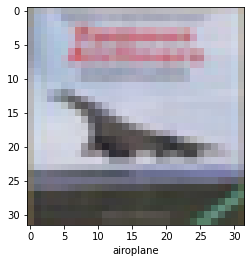

In [47]:
plot_sample(x_test, y_test, 3)

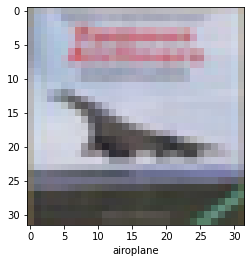

In [48]:
plot_sample(x_test, y_pred_classes_cnn, 3)